***Import Libraries:***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

***Data Collection***

In [2]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('ifood_df.csv')

Saving ifood_df.csv to ifood_df.csv


In [3]:
df.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   

   marital_Widow  education_2n Cycle  education_Basic  education_Graduation  \
0              0                   0                0                     1   
1              0                   0                0                     1   
2              0                   0                0                     1   
3              0                   0                0                     1   
4              0                   0                0                     0   

   education_Master  education_PhD  MntTotal  MntRegularProds  \
0                 0              0      1529             1441   
1                 0              0        21               15   
2                 0              0       734              692   
3                 0              0        48               43   
4                 0              1       407              392   

   AcceptedCmpOverall  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 39 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

***Data Exploration and Cleaning***

In [5]:
# Get the shape of the dataset
print("Dataset shape:", df.shape)

Dataset shape: (2205, 39)


In [6]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
              Income      Kidhome     Teenhome      Recency     MntWines  \
count    2205.000000  2205.000000  2205.000000  2205.000000  2205.000000   
mean    51622.094785     0.442177     0.506576    49.009070   306.164626   
std     20713.063826     0.537132     0.544380    28.932111   337.493839   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35196.000000     0.000000     0.000000    24.000000    24.000000   
50%     51287.000000     0.000000     0.000000    49.000000   178.000000   
75%     68281.000000     1.000000     1.000000    74.000000   507.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2205.000000      2205.000000      2205.000000       2205.000000   
mean     26.403175       165.312018        37.756463         27.128345   
std      39.784484       217.784507        54.824635         41.130468  

In [7]:
# Display information about missing values
df.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpOverall      0
dtype: int64

In [8]:
# Drop rows with missing values
df_cleaned = df.dropna()
df_filled = df.fillna(df.mean())
# Check for any remaining missing values
print("\nMissing Values after Cleaning:")
print(df_filled.isnull().sum())


Missing Values after Cleaning:
Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntReg

In [9]:
# Check for duplicate rows
duplicates = df.duplicated()
print("\nNumber of Duplicate Rows:", duplicates.sum())


Number of Duplicate Rows: 184


In [10]:
# Remove duplicates
df_no_duplicates = df.drop_duplicates()

In [11]:
# Confirm that duplicates are removed
print("\nShape after Removing Duplicates:", df_no_duplicates.shape)


Shape after Removing Duplicates: (2021, 39)


***Descriptive Statistics***


In [12]:
print(df.columns)

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')


In [13]:
# Calculate the total number of purchases
df['TotalPurchases'] = (df['NumDealsPurchases'] + df['NumWebPurchases'] +
                        df['NumCatalogPurchases'] + df['NumStorePurchases'])
# Display the first few rows to verify
print(df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'TotalPurchases']].head())

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  3                8                   10                  4   
1                  2                1                    1                  2   
2                  1                8                    2                 10   
3                  2                2                    0                  4   
4                  5                5                    3                  6   

   TotalPurchases  
0              25  
1               6  
2              21  
3               8  
4              19  


In [14]:
# Calculate the average purchase value
df['AvgPurchaseValue'] = df['MntTotal'] / df['TotalPurchases']
# Handle potential division by zero by filling NaN values with 0
df['AvgPurchaseValue'] = df['AvgPurchaseValue'].fillna(0)
# Display summary statistics of the new column
print("Average Purchase Value:\n", df['AvgPurchaseValue'].describe())

Average Purchase Value:
 count    2205.000000
mean             inf
std              NaN
min         0.466667
25%         7.800000
50%        20.809524
75%        41.619048
max              inf
Name: AvgPurchaseValue, dtype: float64


/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


***Customer Segmentation***

In [18]:
# Select features for clustering
features = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
            'NumStorePurchases']

X = df[features]

In [19]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

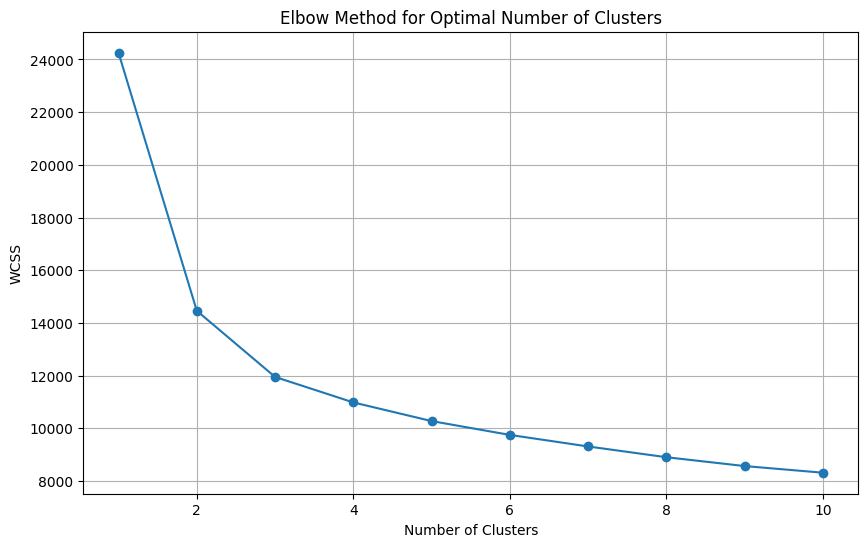

In [24]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)  # Set n_init explicitly
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [26]:
# Fit the K-Means model with the chosen number of clusters
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)  # Explicitly set n_init
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [27]:
# Analyze the clusters
cluster_analysis = df.groupby('Cluster')[features].mean()
print(cluster_analysis)

               Income    MntWines  MntFruits  MntMeatProducts  \
Cluster                                                         
0        75071.689320  527.174757  93.148867       449.585761   
1        34034.744041   35.398964   4.650777        19.926425   
2        71884.486022  687.380645  39.107527       346.030108   
3        52274.148069  339.922747  14.512876        97.549356   

         MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
Cluster                                                                       
0             133.576052         99.802589     92.902913           1.517799   
1               6.782383          4.934715     14.245596           1.850777   
2              55.221505         37.402151     64.361290           1.784946   
3              20.933476         14.645923     53.141631           4.349785   

         NumWebPurchases  NumCatalogPurchases  NumStorePurchases  
Cluster                                                           


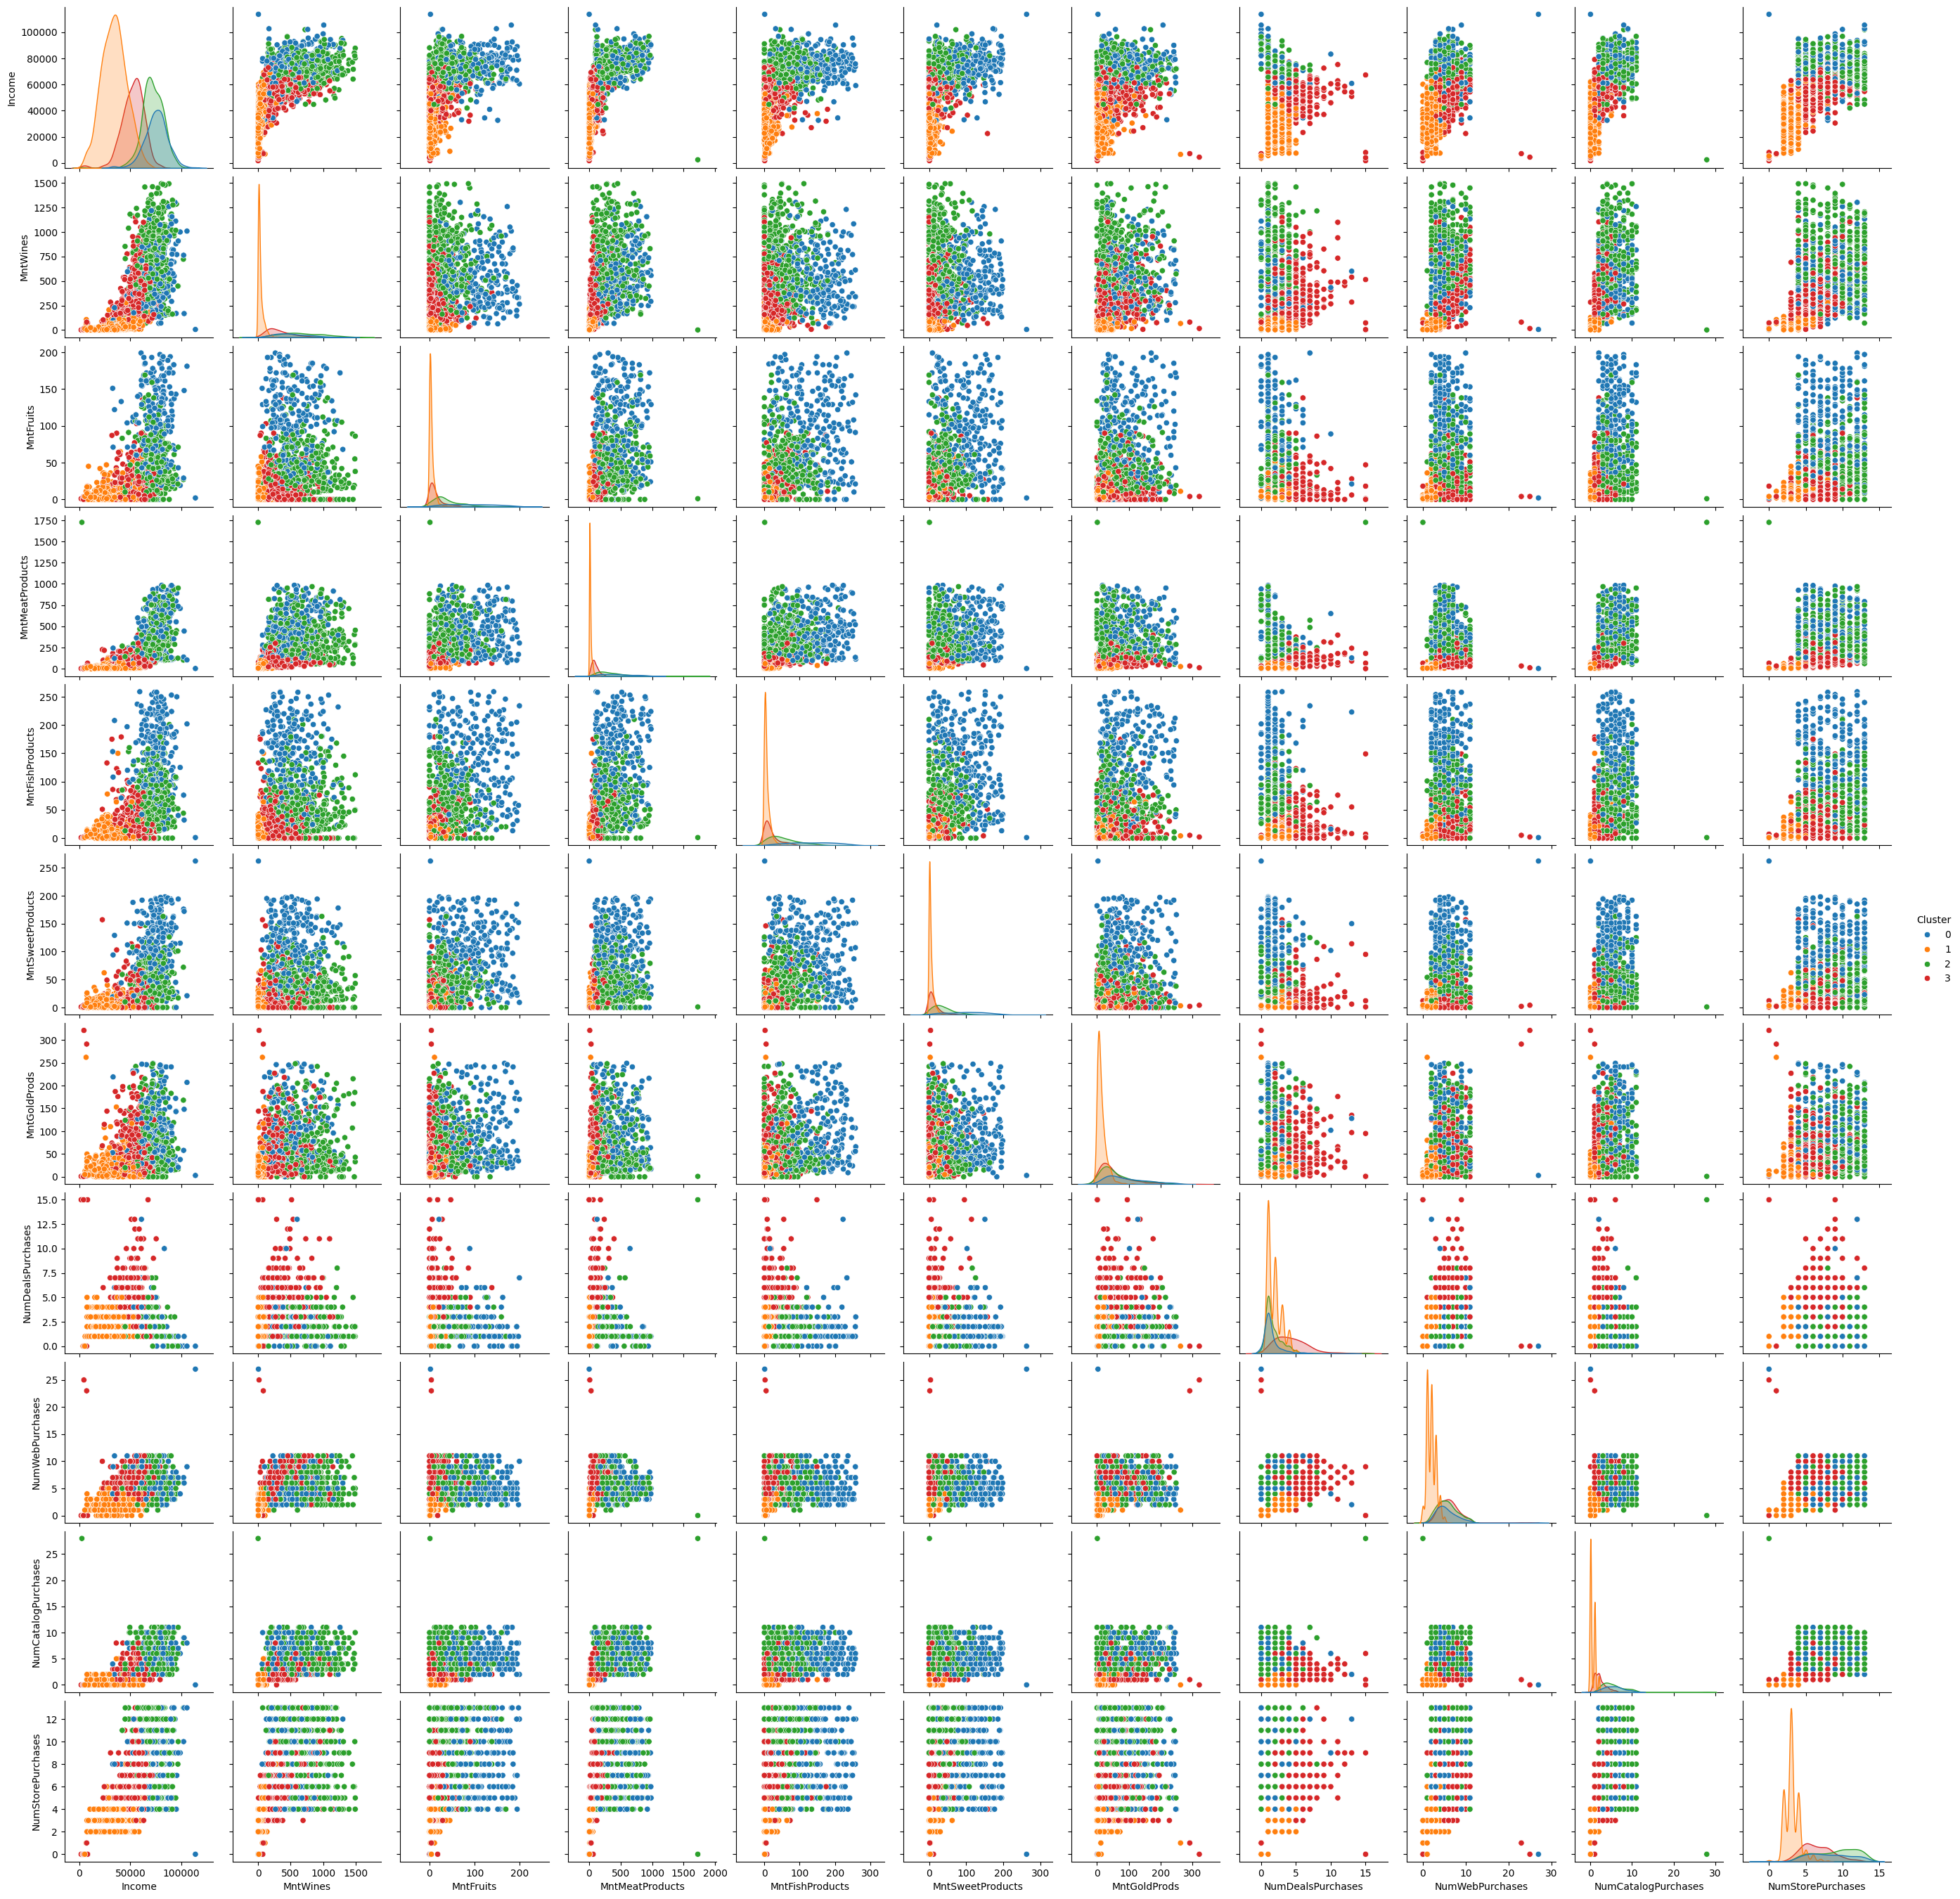

In [28]:
sns.pairplot(df, hue='Cluster', vars=features, palette='tab10')
plt.show()

***Visualization***

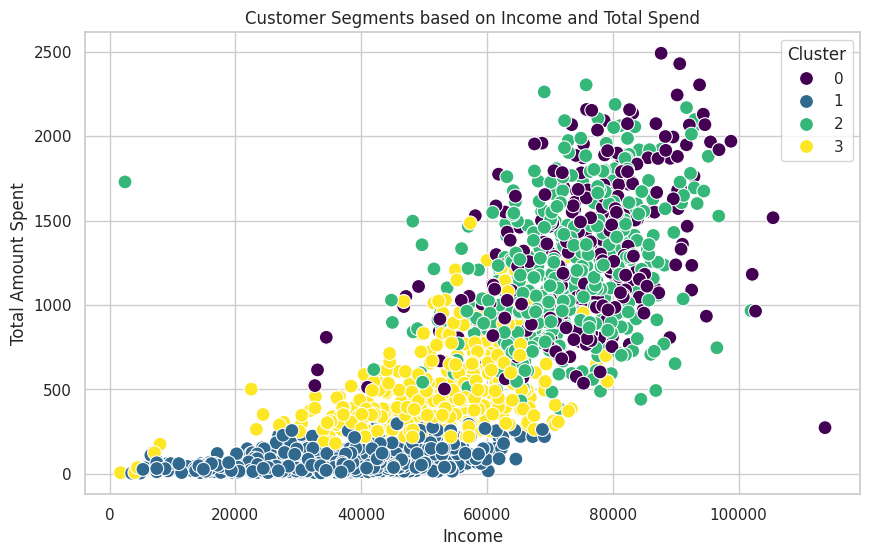

In [29]:
# Set the style for the plots
sns.set(style="whitegrid")
# Scatter plot to visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='MntTotal', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Customer Segments based on Income and Total Spend')
plt.xlabel('Income')
plt.ylabel('Total Amount Spent')
plt.legend(title='Cluster')
plt.show()

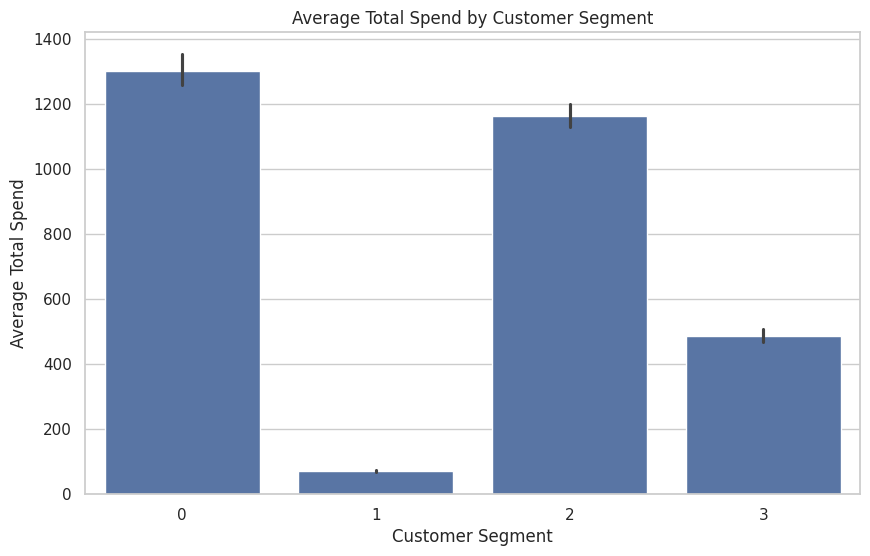

In [33]:
# Bar plot to show the average total spend by cluster
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='MntTotal', data=df)
plt.title('Average Total Spend by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Total Spend')
plt.show()

<Figure size 1200x800 with 0 Axes>

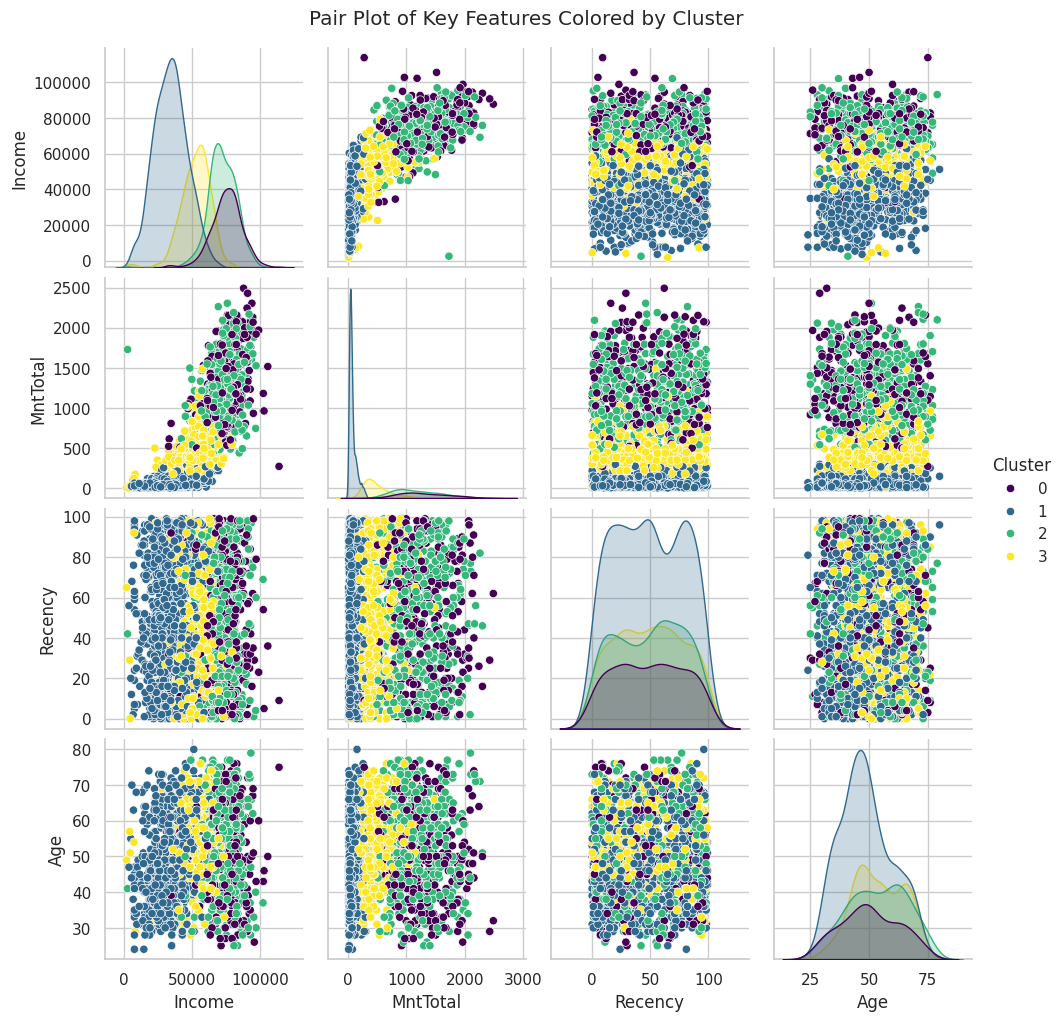

In [34]:
# Pair plot to visualize the relationship between several variables and clusters
plt.figure(figsize=(12, 8))
sns.pairplot(df, vars=['Income', 'MntTotal', 'Recency', 'Age'], hue='Cluster', palette='viridis')
plt.suptitle('Pair Plot of Key Features Colored by Cluster', y=1.02)
plt.show()

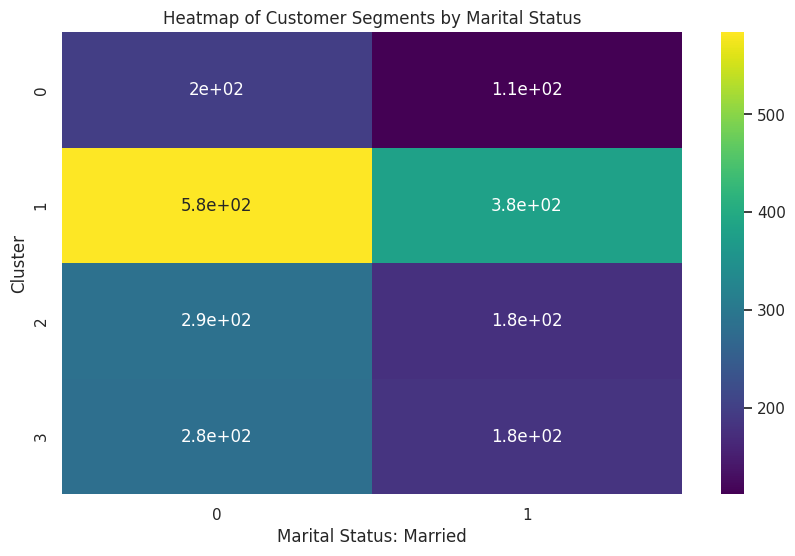

In [35]:
# Heatmap to show the distribution of customers across clusters and another categorical feature
plt.figure(figsize=(10, 6))
cluster_marital = pd.crosstab(df['Cluster'], df['marital_Married'])
sns.heatmap(cluster_marital, annot=True, cmap='viridis')
plt.title('Heatmap of Customer Segments by Marital Status')
plt.xlabel('Marital Status: Married')
plt.ylabel('Cluster')
plt.show()

***Insights and Recommendations***

1.Segment Analysis:

High-Value Customers (Segment 1): Customers in this segment have the highest average spending across all product categories. They tend to make frequent purchases both online and in-store. They also have a higher likelihood of accepting marketing campaigns, indicating responsiveness to promotional efforts.
Moderate-Value Customers (Segment 2): These customers have moderate spending patterns and a balanced mix of purchases across different categories. They show moderate responsiveness to marketing campaigns and have average visit frequencies to the company’s website.
Price-Sensitive Customers (Segment 3): This segment has lower average spending and tends to take advantage of discounts and deals. They have a higher number of deal purchases and fewer regular purchases. They are less responsive to marketing campaigns but are frequent visitors to the company’s website, indicating price sensitivity and value-seeking behavior.
Low-Value Customers (Segment 4): Customers in this segment have the lowest average spending. They have fewer transactions, low engagement with marketing campaigns, and are less likely to visit the website. This segment may include customers who are less loyal or have specific needs that are not currently being met.

2.Product Preferences:
Wines and Meat Products: High-value customers show a strong preference for wines and meat products. These categories are the most significant contributors to total spending.
Sweet Products and Fish Products: These categories have lower overall spending but are popular among price-sensitive customers.
Marketing Campaigns:

The highest response rates to marketing campaigns are seen among high-value and moderate-value customers. These customers are more likely to accept marketing campaigns, which indicates that targeted promotional efforts can be effective in driving sales in these segments.
Customer Demographics:

3.Income: Higher income is correlated with higher spending across all product categories, particularly in segments 1 and 2.
Family Structure: Customers with children (both 'Kidhome' and 'Teenhome') are more likely to belong to high-value or moderate-value segments, potentially due to higher household needs.